<a href="https://colab.research.google.com/github/iliya1984/DevML/blob/main/computer_vision/autoencoders/linear_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear autoencoder

### Importing the libraries

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
#from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')
tf.__version__

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'2.15.0'

In [16]:
%run '/content/drive/MyDrive/Workspace/Computer Vision/autoencoders/mnist_dataset.ipynb'

### Loading the dataset

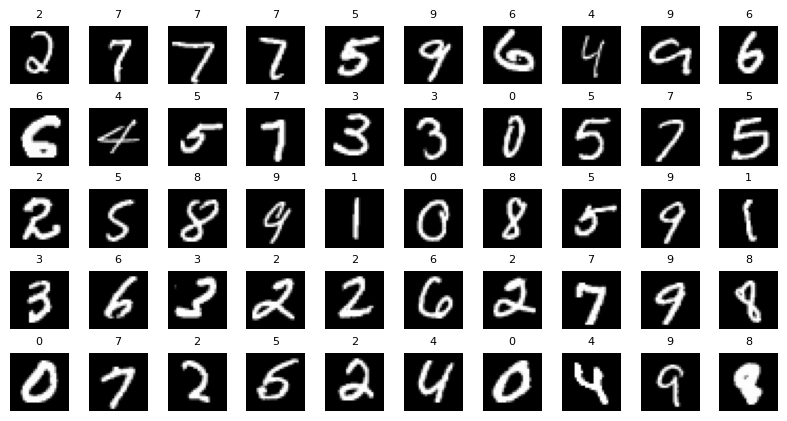

In [17]:
(X_train, y_train), (X_test, y_test), metadata = MnistDataset.load(preview=True, preview_size=(10, 5))

In [18]:
metadata

{'dataset_url': 'https://keras.io/api/datasets/mnist/',
 'train_set_size': 60000,
 'test_set_size': 10000,
 'image_size': (28, 28)}

### Pre-processing the images

In [19]:
#Scalling pixel values to be in range (0, 1)
X_train = X_train / 255
X_test = X_test / 255

#Reshape datasets. Convert image matrix to a vector
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

X_train.shape

(60000, 784)

### Building and training the linear autoencoder

In [20]:

autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units = 128, activation='relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 32, activation='relu')) # Encoded image

# Decode
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units = 784, activation='sigmoid'))

In [21]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 222

In [22]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [23]:
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1526 - accuracy: 0.0099
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1094 - accuracy: 0.0128
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1005 - accuracy: 0.0125
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0960 - accuracy: 0.0136
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0925 - accuracy: 0.0133
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0902 - accuracy: 0.0137
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0886 - accuracy: 0.0139
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0873 - accuracy: 0.0137
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0864 - accuracy: 0.0141
Epoch 10/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0

### Encoding the images

In [31]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_8').output)

In [32]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6_input (InputLayer)  [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110816 (432.88 KB)
Trainable params: 110816 (432.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


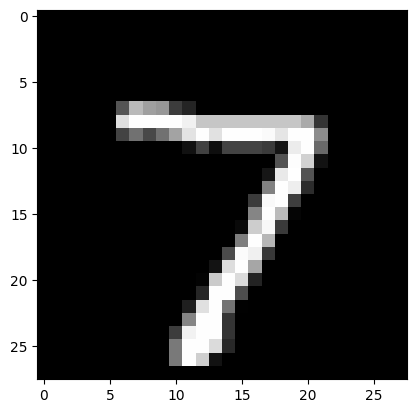

In [33]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray');

In [34]:
encoded_image = encoder.predict(X_test[0].reshape(1,-1))

1/1 [==============================] - 0s 47ms/step


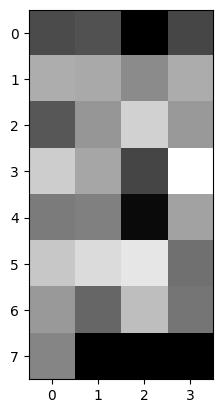

In [35]:
plt.imshow(encoded_image.reshape(8,4), cmap='gray');

### Decoding the images

In [36]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               101136    
                                                                 
Total params: 111568 (435.81 KB)
Trainable params: 111568 (435.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 152ms/step


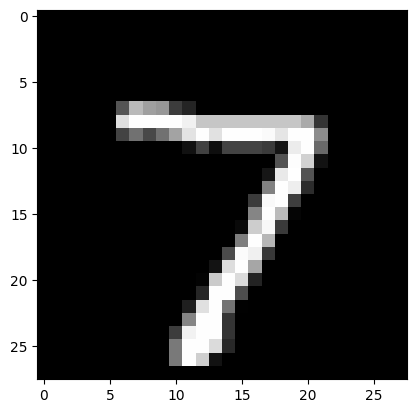

In [38]:
plt.imshow(X_test[0].reshape(28,28), cmap = 'gray');

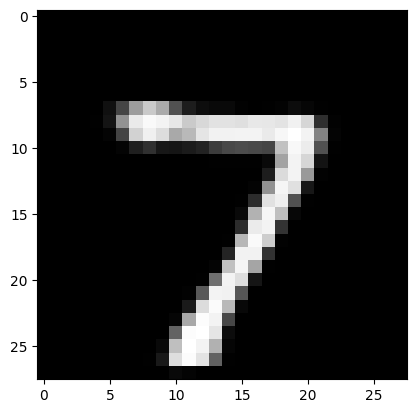

In [39]:
plt.imshow(decoded_image.reshape(28,28), cmap='gray');

1/1 [==============================] - 0s 17ms/step


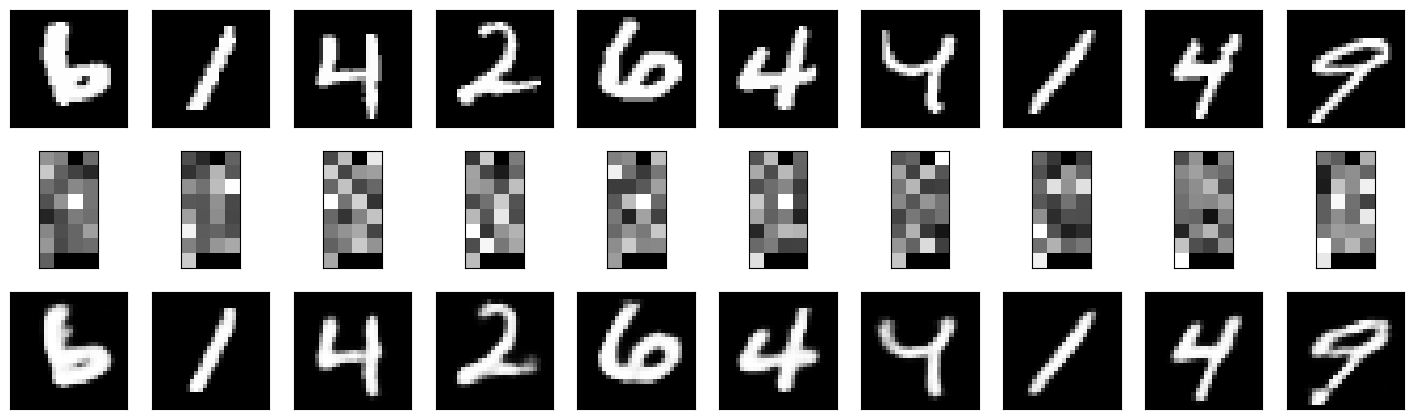

In [40]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0] - 1, size = n_images)
#print(test_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  #print(i, image_index)
  # Original image
  ax = plt.subplot(10,10,i + 1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10,i + 1 + n_images)
  encoded_image = encoder.predict(X_test[image_index].reshape(1,-1))
  plt.imshow(encoded_image.reshape(8,4), cmap = 'gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10,i + 1 + n_images * 2)
  plt.imshow(decoder.predict(encoded_image).reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())